## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [2]:
#importing libraries
import pandas as pd #data manupulation
import numpy as np #numerical computing
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #higher level visualization

In [3]:
#loading the dataset
titanic = pd.read_csv ("titanic.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#screening the dataset
#info() - for checking missing values and summary status
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 rows and 12 columns. There are 7 numerical columns (including integer and float) and 5 categorical columns. 

In [5]:
#describing statistical summary
round(titanic.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.0,2.0,30.0,1.0,0.0,32.0
std,257.0,0.0,1.0,15.0,1.0,1.0,50.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,224.0,0.0,2.0,20.0,0.0,0.0,8.0
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.0
75%,668.0,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.0


In [6]:
#checking for missing values
missing_values = titanic.isna().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here Age column is having 177 missing values and Cabin column is having 687 missing values. For this we will first find out the missing perchentage of these columns. If the missing perchentage is more than 30% which really don't give any relevance of the data so we can remove that column. If the missing perchentage is less than 30% we can impute with mean or median or remove the rows with invalid values.

In [7]:
#missing percentage of Age column
#(missing values count in specific column using sum / length of rows in the dataframe)*100
missing_percentage_age = (titanic.Age.isna().sum()/len(titanic)) * 100
print("Missing perchentage of Age is: ", round(missing_percentage_age))

Missing perchentage of Age is:  20


Now we will see the distribution through histogram to see the how the data is distributed. If the data is normally distributed then we will impute through Mean. If they skewed then through Median.

Text(0, 0.5, 'Frequency')

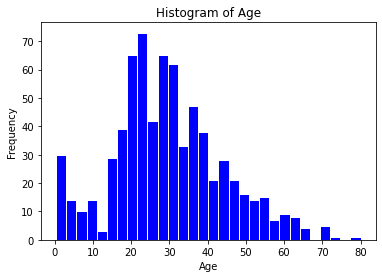

In [8]:
#histogram for Age column
plt.hist(titanic.Age, bins = 30, color = "blue", edgecolor = "white")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

Here some data of Age column has point values. Here the histogram is rightly skewed and has a long tail due to some values with higher age due to the presence of outliers. Most of the ranges are in between 20 -40 range. As the age value is between 0 - 100 as per literature review. So we will set the valid range for the Age column and remove the rows with invalid rows.

In [9]:
# set the range 0-100 using clip () which willmake any values less than 0 will become zero and any values bigger than 100 will become 100
#dataframe[designated column]=dataframe[desgnated column].clip(lower = 0, upper= 100)
titanic["Age"] = titanic["Age"].clip(lower = 0, upper = 100)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
#checking for minimum value and maximum value
minimum_age = titanic["Age"].min()
minimum_age

0.42

In [17]:
maximum_age = titanic["Age"].max()
maximum_age

80.0

In [18]:
#imputation of missing values
#checking for missing values
titanic["Age"].isna().sum()

#impute through median as skewed
#dataframe['designated column'].fillna(dataframe['designated column'].median(), inplace = True)
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)

In [19]:
#checking for missing values after imputation to see wheter imputed or not
titanic.Age.isna().sum()

0

Here in Age column missing value is zero means all of the missing values are imputed with median.

In [29]:
#missing perchentage of Cabin column
missing_percentage = (titanic["Cabin"].isna().sum()/len(titanic))*100
print("Missing percentage of Cabin is: ",round(missing_percentage))

Missing percentage of Cabin is:  77


As here missing perchentage of Cabin column is greater than 30% so we will remove it as it is not showing any data relevance.

In [20]:
#removing the column
del titanic["Cabin"]
#checking the columns name
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [21]:
#now again checking for missing values for the whole dataset
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Here only Embarked column has 2 missing values. Otherwise all the missing values in Age column is handled with Median.Cabin column is removed as it contained 70% missing values.

In [65]:
#here Pclass and Survived in numerical though it's in categorical. So we need to change the dtypes of Pclass
#df[column name] = df[column name].astype("category")
titanic["Pclass"] = titanic["Pclass"].astype("category")
titanic["Survived"] = titanic["Survived"].astype("category")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    object  
dtypes: category(2), float64(2), int64(3), object(4)
memory usage: 64.8+ KB


In [66]:
#numerical columns and categorical columns identification
numerical_columns = titanic.select_dtypes(include = ['number'])
numerical_columns

,PassengerId,Age,SibSp,Parch,Fare
0,1,22.0,1,0,7.2500
1,2,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,4,35.0,1,0,53.1000
4,5,35.0,0,0,8.0500
...,...,...,...,...,...
886,887,27.0,0,0,13.0000
887,888,19.0,0,0,30.0000
888,889,28.0,1,2,23.4500
889,890,26.0,0,0,30.0000


In [67]:
categorical_columns = titanic.select_dtypes(include = ['object', 'category']).columns.tolist()
categorical_columns                                           

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']

In [96]:
#outliers count for numerical columns
# Detecting and printing outliers for each numeric column using the IQR method
for col in numerical_columns:
    Q1 = titanic[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = titanic[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR  # Lower limit for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper limit for outliers

    # Filtering outliers
    outliers = titanic[(titanic[col] < lower_bound) | (titanic[col] > upper_bound)]
    
    # Printing outlier values for each column
    print(f"Outliers in {col}:") #print the columns name
    print(outliers[col].values) # Prints the actual outlier values
    print("-" * 50) #seperator
    
    # Printing outliers count for each column
    outliers_count = outliers.shape[0]  # Count of outliers
    print(f"Number of outliers in {col}: {outliers_count}")
    print("-" * 50)  # Separator

Outliers in PassengerId:
[]
--------------------------------------------------
Number of outliers in PassengerId: 0
--------------------------------------------------
Outliers in Age:
[ 2.   58.   55.    2.   66.   65.    0.83 59.   71.   70.5   2.   55.5
  1.   61.    1.   56.    1.   58.    2.   59.   62.   58.   63.   65.
  2.    0.92 61.    2.   60.    1.    1.   64.   65.   56.    0.75  2.
 63.   58.   55.   71.    2.   64.   62.   62.   60.   61.   57.   80.
  2.    0.75 56.   58.   70.   60.   60.   70.    0.67 57.    1.    0.42
  2.    1.   62.    0.83 74.   56.  ]
--------------------------------------------------
Number of outliers in Age: 66
--------------------------------------------------
Outliers in SibSp:
[3 4 3 3 4 5 3 4 5 3 3 4 8 4 4 3 8 4 8 3 4 4 4 4 8 3 3 5 3 5 3 4 4 3 3 5 4
 3 4 8 4 3 4 8 4 8]
--------------------------------------------------
Number of outliers in SibSp: 46
--------------------------------------------------
Outliers in Parch:
[1 2 1 5 1 1 5 2 2 1 

In Age- there are around 66 outliers.
In SibSp- there are 46 outliers.
In Parch- there are 213 outliers.
In Fare- there are around 116 outliers.

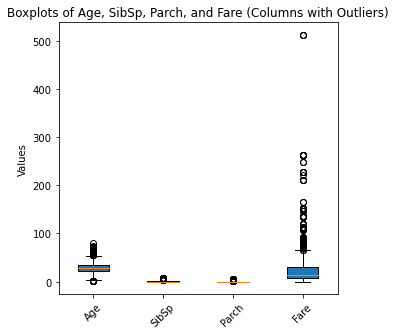

In [98]:
#boxplot
#define the columns that have outliers
outlier_columns = ["Age", "SibSp","Parch","Fare"]

#create boxplot
plt.figure(figsize=(5, 5))
plt.boxplot([titanic[col] for col in outlier_columns], labels=outlier_columns, patch_artist=True)

# Add title and labels
plt.title("Boxplots of Age, SibSp, Parch, and Fare (Columns with Outliers)")
plt.ylabel("Values")
plt.xticks(rotation=45)

# Show plot
plt.show()

Here this the boxplots of the variables in Titanic datasets which have outliers.

Here for Age:
    1.The median is around 25-40 range. 
    2.The dots below and above the whiskers mean that there are outliers below 0 and above 60. So, we can say the passengers that were boarded - some of them were with very young age and some of them were very old age.
    3.The distribution is moderate but due to outliers it's right-skewed.
    
Here for SibSp and Parch :
    1. Here values are mostly around 0-1 range. 
    2. So, we can say most passengers have no or maybe few siblings and children as well.
    3. There are outliers showing few families with higher numbers of siblings, children on board.
    
Here for Fare :
    1.The median is around 15-25 range. 
    2.There are outliers showing that some values are in extreme higher range.
    3.The distribution is rightly skewed due to the presence of outliers.
    4.So, it means most of the passengers are travelling with lower fares but few passengers are travelling with 1st class ticket which is showing extreme outliers.
    

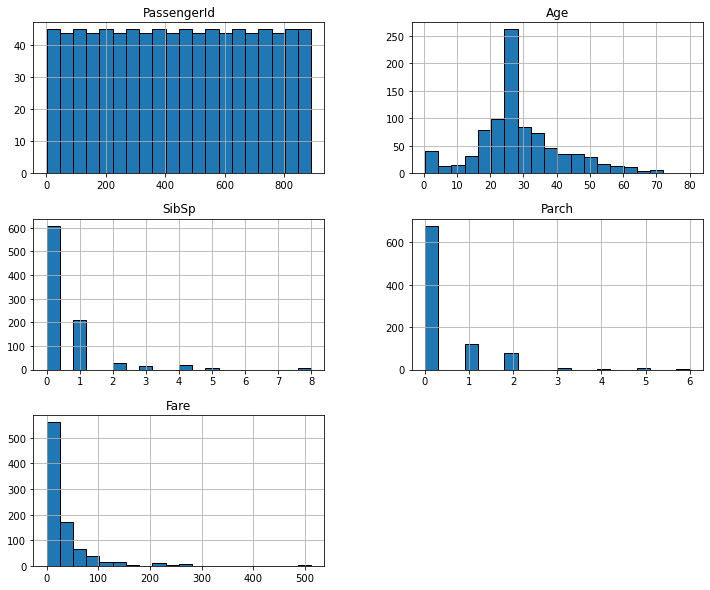

In [70]:
#histogram
#find out the numerical columns
numerical_columns = titanic.select_dtypes(["number"]).columns.tolist()
numerical_columns
#create histograms for these
#dataframe[numerical columns].hist(figuresize = , bins = , edge color=)
titanic[numerical_columns].hist(figsize=(12, 10), bins=20, edgecolor="black")

#show the plot
plt.show()

For Age histogram,
Here's the data is rightly sweked.
The most passengers are from the age of 10 - 40 means most of the passengers were from children and young adults group. There's also highest peak at the age of 25 -30 indicating the above statement also.
The count decreases when the age increases.

for SibSp and Parch histogram,
The data is showing exponential distribution.
Most passengers on board had fewer family members as most of the values are in 0 - 1 range. Though few passengers were travelled with higher family members which is evident by the presence of outliers.

for Fare histogram,
The distribution of the data is bimodal as there are two distinct peaks around 0-1 range.
Most of the passengers were in 3rd class while boarding and few also paid extreme for the luxurious first class is visisble through the outliers.


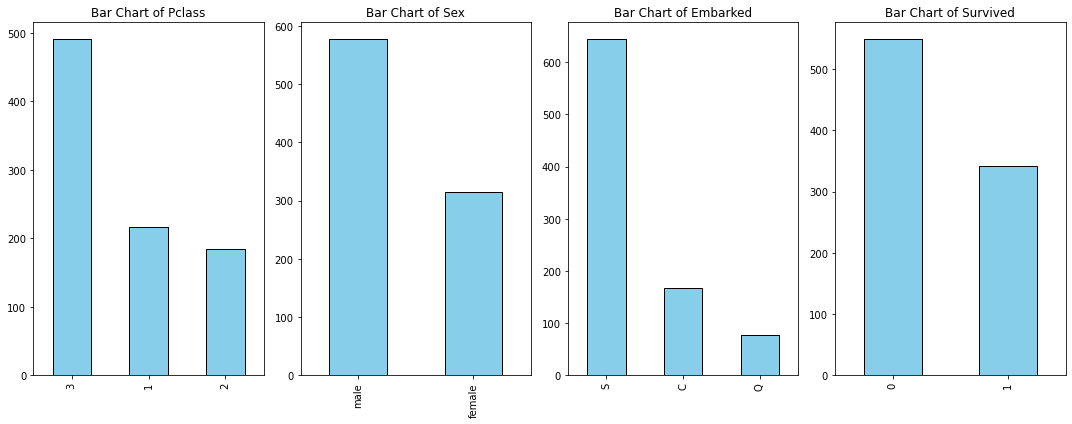

In [72]:
#bar charts
#finding the categorical columns
categorical_columns_for_barcharts = ["Pclass","Sex","Embarked", "Survived"]

#create barcharts for all categorical columns

# Create subplots for all categorical columns
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns_for_barcharts), figsize=(15, 6))

# If there's only one categorical column, axes will not be an array, so we need to handle that case
if len(categorical_columns_for_barcharts) == 1:
    axes = [axes]

# Plot bar charts for each categorical column using apply
# Apply function to plot bar charts for each categorical column
#apply(lambda col: ...) → Calls the function on each column in categorical_columns
#col.value_counts().plot(kind='bar', figsize=(12, 8), ...) → Creates a bar chart for each categorical column.
#col.name → Dynamically gets the column name for the title.
titanic[categorical_columns_for_barcharts].apply(
    lambda col: col.value_counts().plot(
        kind='bar', 
        ax=axes[categorical_columns_for_barcharts.index(col.name)],  # Use the column's index in the list
        color='skyblue', 
        edgecolor='black', 
        title=f'Bar Chart of {col.name}'
    )
)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Based on these Barcharts we can say that:
    
    More passengers were in 3rd class on board.
    
    Male passengers outnumbers the female passengers by 60%.Remaining 40% were female passengers.
    
    Among the three ports,most passengers boarded at Southampton, with smaller groups embarking at Cherbourg and Queenstown.
    
    The non-survivors number is greater than the survivors for the passengers who boarded Titanic.

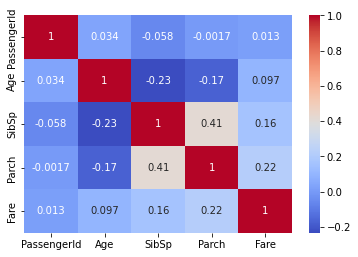

In [73]:
#Correlation heatmap 
#using seaborn to create correlation matrix
#have to use corr() function on dataframe
#sns.heatmap(corr, annot = True (for showing the values), cmap= "coolwarm" (show color))

# Compute correlation matrix
corr = titanic.corr()

# Plot heatmap with annotation
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

Age shows weak positive correlations with PassengerId (0.034) and Fare (0.097), and weak negative correlations with SibSp (-0.23) and Parch (-0.17).

SibSp has a weak negative correlation with PassengerId (-0.058) and Age (-0.23), a moderate positive correlation with Parch (0.41), and a weak positive correlation with Fare (0.16).

Parch has very weak negative correlations with PassengerId (-0.0017) and Age (-0.17), a moderate positive correlation with SibSp (0.41), and a weak positive correlation with Fare (0.22).

Fare shows very weak positive correlations with PassengerId (0.013), Age (0.097), SibSp (0.16), and Parch (0.22).


We will do the hypothesis testing with countplot and histplotm.

1. Determine if the survival rate is associated to the class of passenger

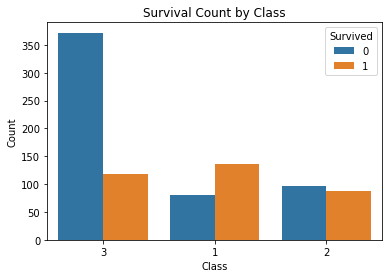

In [78]:
# Plot survival rate by class by countplot
# Calculate survival rate for each passenger class
sns.countplot(x="Pclass", hue="Survived", data= titanic)
plt.title ("Survival Count by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

There are more survivors than non-survivors in 1st class. So the survival rate is higher here.

There survival rate between survivors and non-survivors are balanced relatively in 2nd class. Showing the number of survivors with a slight higher number.

The survival rate of 3rd class passengers are significantly higher for non-survivors. So the survival rate is lower for this class. 

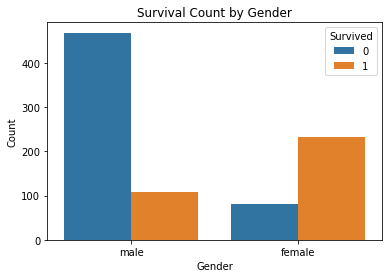

In [81]:
#Determine if the survival rate is associated to the gender
sns.countplot(x="Sex", hue="Survived", data= titanic)
plt.title('Survival Count by Gender')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

There are significantly more non-survivors than survivors among male passengers.

There are more survivors than non-survivors among female passengers.

This chart highlights that a larger proportion of female passengers survived compared to male passengers.

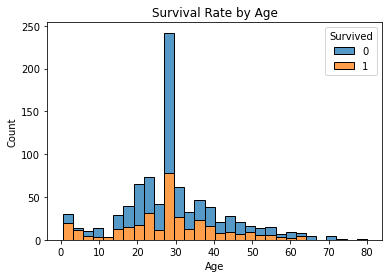

In [86]:
#Determine the survival rate is associated to the age
sns.histplot(titanic, x="Age" , hue="Survived", multiple='stack')
plt.title("Survival Rate by Age")
plt.xlabel('Age')
plt.ylabel("Count")
plt.show()

A significant number of passengers who did not survive were around the age of 30.

There were generally more non-survivors than survivors across most age groups.

The age distribution is spread out, with passengers of all ages affected by the tragedy.